## データのダウンロード&解凍

In [1]:
%%bash
mkdir zips
cd ./zips

for i in {01..10}; do
    wget http://mathieu.delalandre.free.fr/projects/sesyd/symbols/floorplans/floorplans16-$i.zip
    unzip floorplans16-$i.zip -d ../data/FloorPlansGraph5_iter
done

cd ./..

Archive:  floorplans16-01.zip
   creating: ../data/FloorPlansGraph5_iter/floorplans16-01/
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_0.gom  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_0.svg  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_0.tiff  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_0.xml  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_1.gom  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_1.svg  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_1.tiff  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_1.xml  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_10.gom  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_10.svg  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_10.tiff  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_10.xml  
  inflating: ../data/FloorPlansGraph5_i

mkdir: cannot create directory ‘zips’: File exists
--2022-08-02 10:03:21--  http://mathieu.delalandre.free.fr/projects/sesyd/symbols/floorplans/floorplans16-01.zip
Resolving mathieu.delalandre.free.fr (mathieu.delalandre.free.fr)... 212.27.63.105, 51.159.199.148, 212.27.60.19, ...
Connecting to mathieu.delalandre.free.fr (mathieu.delalandre.free.fr)|212.27.63.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6281557 (6.0M) [application/zip]
Saving to: ‘floorplans16-01.zip’

     0K .......... .......... .......... .......... ..........  0%  103K 59s
    50K .......... .......... .......... .......... ..........  1%  206K 44s
   100K .......... .......... .......... .......... ..........  2% 8.13M 29s
   150K .......... .......... .......... .......... ..........  3% 6.77M 22s
   200K .......... .......... .......... .......... ..........  4%  214K 23s
   250K .......... .......... .......... .......... ..........  4% 7.07M 19s
   300K .......... .......... ..

## データ前処理

In [1]:
!python utils/svg_utils/build_graph_bbox.py

data/FloorPlansGraph5_iter/floorplans16-01\file_0.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_1.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_10.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_11.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_12.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_13.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_14.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_15.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_16.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_17.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_18.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_19.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_2.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_20.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_21.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_22.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_23.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_24.svg
data/FloorPla

utils/svg_utils/build_graph_bbox.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adj = np.eye(pos.shape[0], pos.shape[0]).astype(np.bool)
utils/svg_utils/build_graph_bbox.py:131: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  same_cc = np.zeros((len(bboxs), len(bboxs))).astype(np.bool)
utils/svg_utils/build_graph_bbox.py:174: DeprecationWarning

### 学習

In [14]:
%run cad_recognition/train.py --total_epochs 20 --batch_size 4 --data_dir data/FloorPlansGraph5_iter --phase train --lr 2.5e-4 --lr_adjust_freq 9999999999999999999999999999999999999 --in_channels 5 --n_blocks 2 --n_blocks_out 2 --arch centernet3cc_rpn_gp_iter2  --graph bezier_cc_bb_iter --data_aug true  --weight_decay 1e-5 --postname run182_2 --dropout 0.0 --do_mixup 0 --bbox_sampling_step 10

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\ottos\\akariinc\\YOLaT-VectorGraphicsRecognition\\log\\sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220729-170220_9f9cc488-ebd5-468c-9815-2ce56be8ec5a\\sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220729-170220_9f9cc488-ebd5-468c-9815-2ce56be8ec5a.log'

## train.py

In [1]:
%pwd

'c:\\Users\\ottos\\akariinc\\YOLaT-VectorGraphicsRecognition'

In [2]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.
%cd ./cad_recognition

import __init__
import torch
import numpy as np
import logging
import time
from itertools import repeat, product

#from torch_geometric.data import DataLoader, DataListLoader
from torch import Tensor
from torch.utils.data import DataLoader
from torch.nn import functional as F
import torch_geometric.transforms as T
from torch_geometric.nn.data_parallel import DataParallel
from torch_geometric.data import InMemoryDataset
from cad_recognition.config import OptInit
from sklearn.metrics import confusion_matrix
import torchvision


from utils.ckpt_util import load_pretrained_models, load_pretrained_optimizer, save_checkpoint
from utils.metrics import AverageMeter
from utils import optim
from utils.det_util import get_batch_statistics, ap_per_class

from Datasets.graph_dict3 import SESYDFloorPlan as CADDataset
from cad_recognition.architecture3cc_rpn_gp_iter2 import SparseCADGCN, DetectionLoss



def non_max_suppression(prediction, conf_thres=0.25, iou_thres=0.45, classes=None, agnostic=False, labels=()):
    """Performs Non-Maximum Suppression (NMS) on inference results
    Returns:
         detections with shape: nx6 (x1, y1, x2, y2, conf, cls)
    """

    nc = prediction.shape[2] - 5  # number of classes
    xc = prediction[..., 4] > conf_thres  # candidates

    # Settings
    min_wh, max_wh = 2, 4096  # (pixels) minimum and maximum box width and height
    max_det = 300  # maximum number of detections per image
    max_nms = 30000  # maximum number of boxes into torchvision.ops.nms()
    time_limit = 10.0  # seconds to quit after
    redundant = True  # require redundant detections
    multi_label = nc > 1  # multiple labels per box (adds 0.5ms/img)
    merge = False  # use merge-NMS

    t = time.time()
    output = [torch.zeros((0, 6), device=prediction.device)] * prediction.shape[0]
    for xi, x in enumerate(prediction):  # image index, image inference
        # Apply constraints
        # x[((x[..., 2:4] < min_wh) | (x[..., 2:4] > max_wh)).any(1), 4] = 0  # width-height
        x = x[xc[xi]]  # confidence

        # Cat apriori labels if autolabelling
        if labels and len(labels[xi]):
            l = labels[xi]
            v = torch.zeros((len(l), nc + 5), device=x.device)
            v[:, :4] = l[:, 1:5]  # box
            v[:, 4] = 1.0  # conf
            v[range(len(l)), l[:, 0].long() + 5] = 1.0  # cls
            x = torch.cat((x, v), 0)

        # If none remain process next image
        if not x.shape[0]:
            continue

        # Compute conf
        x[:, 5:] *= x[:, 4:5]  # conf = obj_conf * cls_conf

        # Box (center x, center y, width, height) to (x1, y1, x2, y2)
        box = x[:, :4]

        # Detections matrix nx6 (xyxy, conf, cls)
        if multi_label:
            i, j = (x[:, 5:] > conf_thres).nonzero(as_tuple=False).T
            x = torch.cat((box[i], x[i, j + 5, None], j[:, None].float()), 1)
        else:  # best class only
            conf, j = x[:, 5:].max(1, keepdim=True)
            x = torch.cat((box, conf, j.float()), 1)[conf.view(-1) > conf_thres]

        # Filter by class
        if classes is not None:
            x = x[(x[:, 5:6] == torch.tensor(classes, device=x.device)).any(1)]

        # Apply finite constraint
        # if not torch.isfinite(x).all():
        #     x = x[torch.isfinite(x).all(1)]

        # Check shape
        n = x.shape[0]  # number of boxes
        if not n:  # no boxes
            continue
        elif n > max_nms:  # excess boxes
            x = x[x[:, 4].argsort(descending=True)[:max_nms]]  # sort by confidence

        # Batched NMS
        c = x[:, 5:6] * (0 if agnostic else max_wh)  # classes
        boxes, scores = x[:, :4] + c, x[:, 4]  # boxes (offset by class), scores
        i = torchvision.ops.nms(boxes, scores, iou_thres)  # NMS
        if i.shape[0] > max_det:  # limit detections
            i = i[:max_det]
        if merge and (1 < n < 3E3):  # Merge NMS (boxes merged using weighted mean)
            # update boxes as boxes(i,4) = weights(i,n) * boxes(n,4)
            iou = box_iou(boxes[i], boxes) > iou_thres  # iou matrix
            weights = iou * scores[None]  # box weights
            x[i, :4] = torch.mm(weights, x[:, :4]).float() / weights.sum(1, keepdim=True)  # merged boxes
            if redundant:
                i = i[iou.sum(1) > 1]  # require redundancy

        output[xi] = x[i]
        if (time.time() - t) > time_limit:
            print(f'WARNING: NMS time limit {time_limit}s exceeded')
            break  # time limit exceeded

    return output

def collate(data_list):
    r"""Collates a python list of data objects to the internal storage
    format of :class:`torch_geometric.data.InMemoryDataset`."""
    keys = data_list[0].keys
    data = data_list[0].__class__()

    for key in keys:
        data[key] = []
    slices = {key: [0] for key in keys}

    for item, key in product(data_list, keys):
        data[key].append(item[key])
        if isinstance(item[key], Tensor) and item[key].dim() > 0:
            cat_dim = item.__cat_dim__(key, item[key])
            cat_dim = 0 if cat_dim is None else cat_dim
            s = slices[key][-1] + item[key].size(cat_dim)
        elif isinstance(item[key], list):
            s = slices[key][-1] + len(item[key])
        else:
            s = slices[key][-1] + 1
        slices[key].append(s)
    #print(data['roots'], slices['roots'])
    
    if hasattr(data_list[0], '__num_nodes__'):
        data.__num_nodes__ = []
        for item in data_list:
            data.__num_nodes__.append(item.num_nodes)
    
    for key in keys:
        item = data_list[0][key]
        if isinstance(item, Tensor) and len(data_list) > 1:
            if item.dim() > 0:
                cat_dim = data.__cat_dim__(key, item)
                cat_dim = 0 if cat_dim is None else cat_dim
                data[key] = torch.cat(data[key], dim=cat_dim)
            else:
                data[key] = torch.stack(data[key])
        elif isinstance(item, Tensor):  # Don't duplicate attributes...
            data[key] = data[key][0]
        elif isinstance(item, int) or isinstance(item, float):
            data[key] = torch.tensor(data[key])
        elif isinstance(item, list):
            new_list = []
            for item in data[key]:
                new_list += item
            data[key] = new_list
        slices[key] = torch.tensor(slices[key], dtype=torch.long)

    return data, slices

def main():
    opt = OptInit().get_args()
    logging.info('===> Creating dataloader ...')

    train_dataset = CADDataset(opt.data_dir, opt, partition = 'train', data_aug = opt.data_aug, do_mixup = opt.do_mixup, drop_edge = opt.drop_edge, bbox_sampling_step = opt.bbox_sampling_step)
    train_loader = DataLoader(train_dataset, 
        batch_size=opt.batch_size, 
        shuffle=True, 
        num_workers=8, 
        collate_fn = collate)
    
    test_dataset = CADDataset(opt.data_dir, opt, partition = 'test', data_aug = False, do_mixup = False, drop_edge = False, bbox_sampling_step = opt.bbox_sampling_step)
    test_loader = DataLoader(test_dataset, 
        batch_size=opt.batch_size * 2, 
        shuffle=False, 
        num_workers=8, 
        collate_fn = collate)

#    if opt.multi_gpus:
#        train_loader = DataListLoader(train_dataset, batch_size=opt.batch_size, shuffle=True, num_workers=4)
#    else:
#        train_loader = DataLoader(train_dataset, batch_size=opt.batch_size, shuffle=True, num_workers=4)
    opt.n_classes = len(list(set(train_dataset.class_dict.values())))
    opt.in_channels = test_dataset[0].x.shape[1]
    opt.n_objects = train_dataset.n_objects

    logging.info('===> Loading the network ...')
       
    model = SparseCADGCN(opt).to(opt.device)
    

    if opt.multi_gpus:
        model = DataParallel(SparseDeepGCN(opt)).to(opt.device)
    logging.info('===> loading pre-trained ...')
    model, opt.best_value, opt.epoch = load_pretrained_models(model, opt.pretrained_model, opt.phase)
    logging.info(model)

    logging.info('===> Init the optimizer ...')
    criterion = DetectionLoss(opt) #torch.nn.CrossEntropyLoss().to(opt.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=opt.lr, weight_decay = opt.weight_decay)

    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, opt.lr_adjust_freq, opt.lr_decay_rate)
    optimizer, scheduler, opt.lr = load_pretrained_optimizer(opt.pretrained_model, optimizer, scheduler, opt.lr)

    logging.info('===> Init Metric ...')
    opt.losses = AverageMeter()
    # opt.test_metric = miou
    opt.test_values = AverageMeter()
    opt.test_value = 0.

    logging.info('===> start training ...')
    for _ in range(opt.total_epochs):
        opt.epoch += 1
        train(model, train_loader, optimizer, scheduler, criterion, opt)
        if opt.epoch % 1 == 0 and opt.epoch >= 20:
            test_value = test(model, test_loader, criterion, opt)
        scheduler.step()
    logging.info('Saving the final model.Finish!')


def train(model, train_loader, optimizer, scheduler, criterion, opt):
    model.train()
    for i, (data, slices) in enumerate(train_loader):
        opt.iter += 1

        pos_slice = slices['pos']
        for key in slices:
            if 'edge' in key:
                s = slices[key]
                #print(key, s)
                o = getattr(data, key)
                for i_s in range(0, len(s) - 1):
                    start = s[i_s]
                    end = s[i_s + 1]
                    o[start:end] += pos_slice[i_s]
                setattr(data, key, o)
            elif 'bbox_idx' in key:
                bbox_offset = slices['labels']
                s = slices[key]
                #print(key, s)
                o = getattr(data, key)               
                for i_s in range(0, len(s) - 1):
                    start = s[i_s]
                    end = s[i_s + 1]
                    o[start:end] += bbox_offset[i_s]
                setattr(data, key, o)

        #raise SystemExit

        # ------------------ zero, output, loss
        optimizer.zero_grad()

        if not hasattr(data, 'edge_control'):
            data.edge_control = None
            #data.edge_pos = None


        out = model(data, slices)


        if opt.arch == 'centernet' or opt.arch == 'votenet':
            loss_dict = criterion(out[0], out[1], 
                data.labels.to(opt.device), 
                data.bbox.to(opt.device), 
                data.pos.to(opt.device),
                data.is_control.to(opt.device))
        else:
            loss_dict = criterion(out, data)
        
        # ------------------ optimization
        loss_dict['loss'].backward()
        optimizer.step()

        opt.losses.update(loss_dict['loss'].item())
        # ------------------ show information
        if opt.iter % opt.print_freq == 0:
            output_string = 'Epoch:{}  Iter:{}[{}/{}]  LossMean:{Losses.avg: .4f} '.format(
                opt.epoch, opt.iter, i + 1, len(train_loader), Losses=opt.losses)
            for key in loss_dict:
                output_string +='{}:{:.4f} '.format(key, loss_dict[key])
            output_string += 'lr:{:.4f}'.format(scheduler.get_last_lr()[0])
            logging.info(output_string)
            opt.losses.reset()

        # ------------------ tensor board log
        info = {
            'test_value': opt.test_value,
            'lr': scheduler.get_last_lr()[0]
        }
        for key in loss_dict:
            info[key] = loss_dict[key]
        for tag, value in info.items():
            opt.writer.add_scalar(tag, value, opt.iter)

    #raise SystemExit
    # ------------------ save checkpoints
    # min or max. based on the metrics
    is_best = (opt.test_value > opt.best_value)
    opt.best_value = max(opt.test_value, opt.best_value)

    model_cpu = {k: v.cpu() for k, v in model.state_dict().items()}
    # optim_cpu = {k: v.cpu() for k, v in optimizer.state_dict().items()}
    save_checkpoint({
        'epoch': opt.epoch,
        'state_dict': model_cpu,
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'best_value': opt.best_value,
    }, is_best, opt.ckpt_dir, opt.postname)


def test(model, test_loader, criterion, opt):
    opt.test_values.reset()
    model.eval()
    with torch.no_grad():
        sample_metrics = [[] for i in  range(10)]
        labels = []
        test_loss = {}

        n_true = 0
        n_total = 0

        y_true = []
        y_pred = []


        overall_time = 0
        for i_batch, (data, slices) in enumerate(test_loader):
            print(i_batch)
            torch.cuda.synchronize() 
            start_time = time.time()
            pos_slice = slices['pos']
            for key in slices:
                if 'edge' in key:
                    s = slices[key]
                    #print(key, s)
                    o = getattr(data, key)
                    for i_s in range(0, len(s) - 1):
                        start = s[i_s]
                        end = s[i_s + 1]
                        o[start:end] += pos_slice[i_s]
                    setattr(data, key, o)
                elif key == 'bbox_idx':
                    bbox_offset = slices['labels']
                    s = slices[key]
                    #print(key, s)
                    o = getattr(data, key)               
                    for i_s in range(0, len(s) - 1):
                        start = s[i_s]
                        end = s[i_s + 1]
                        o[start:end] += bbox_offset[i_s]
                    setattr(data, key, o)
            
            if not hasattr(data, 'edge_control'):
                data.edge_control = None
                #data.edge_pos = None

            
            out = model.predict(data, slices)
            
            data.labels = data.labels[out[3]]
            data.has_obj = data.has_obj[out[3]]
            slices['bbox'] = out[4]
            
            loss_dict = criterion(out, data)
            pred_cls = out[0]
            pred_coord = out[1]
            pred_coord_max = out[-1]
        
            
            _, pred_label = pred_cls.max(1)
            n_true += (pred_label == data.labels.cuda()).sum(0)
            n_total += pred_label.size(0)

            y_pred.append(pred_label.cpu().numpy())
            y_true.append(data.labels.cpu().numpy())

            if pred_coord_max is not None:
                pred_coord = pred_coord_max
            
            for key in loss_dict:
                if key not in test_loss:
                    test_loss[key] = []
                test_loss[key].append(loss_dict[key].cpu().data)

            #print(slices)
            image_slice = slices['x']
            label_slice = slices['gt_labels']

            new_pred_coord_list = []
            new_pred_cls_list = []

            for i in range(0, len(image_slice) - 1):
                start = image_slice[i]
                end = image_slice[i + 1]
                is_control_mask = ~data.is_control[start:end].squeeze()
                pos_img = data.pos[start:end][is_control_mask].cuda()

                t_start = slices['bbox'][i]
                t_end = slices['bbox'][i + 1]
                pred_coord_img = pred_coord[t_start:t_end]
                pred_cls_img = pred_cls[t_start:t_end]

                #print(start, end, pred_cls_img.size(), pred_cls.size(), 'fooo')

                #coord = data.bbox[start:end][is_control_mask]
                #center = (coord[:, 0:2] + coord[:, 2:]) / 2.0
                #wh = coord[:, 2:] - coord[:, 0:2]

                start = label_slice[i]
                end = label_slice[i + 1]
                gt_coord_img = data.gt_bbox[start:end]
                gt_coord_img[:, 0] *= data.width[i]
                gt_coord_img[:, 2] *= data.width[i]
                gt_coord_img[:, 1] *= data.height[i]
                gt_coord_img[:, 3] *= data.height[i]
                gt_cls_img = data.gt_labels[start:end].unsqueeze(1)
                targets = torch.cat((torch.zeros((gt_cls_img.size(0), 1)), 
                    gt_cls_img, gt_coord_img), dim = 1)
                labels += data.gt_labels[start:end].tolist()

                #print(pred_coord_img)
                pred_coord_img[:, 0] *= data.width[i]
                pred_coord_img[:, 2] *= data.width[i]
                pred_coord_img[:, 1] *= data.height[i]
                pred_coord_img[:, 3] *= data.height[i]

                #pred_cls_img = torch.cat((torch.ones(pred_cls_img.size(0), 1).cuda(), pred_cls_img), dim = 1)
                if opt.classifier == 'softmax':
                    pred_cls_img = F.softmax(pred_cls_img, dim = 1)

                pred_cls_img = torch.cat((1 - pred_cls_img[:, -1][:, None], pred_cls_img[:, 0:-1]), dim = 1)
                pred = torch.cat((pred_coord_img, pred_cls_img), dim = 1).unsqueeze(0)
                

                outputs = non_max_suppression(pred, conf_thres=0.0, iou_thres=0.5)
                outputs = [x.cpu() for x in outputs]

                

                iou_ths = np.linspace(0.5, 0.95, 10)
                for i_th, th in enumerate(iou_ths):
                    sample_metrics[i_th] += get_batch_statistics(outputs, targets, iou_threshold=th)

                
            #if i_batch == 0: break
        

        iou_ths = np.linspace(0.5, 0.95, opt.map_step)
        AP_total = 0
        output_str = ''
        for i in range(opt.map_step):
            if len(sample_metrics[i]) == 0:  # no detections over whole validation set.
                return None
            
            true_positives, pred_scores, pred_labels = [np.concatenate(x, 0) for x in list(zip(*sample_metrics[i]))]
            precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, labels)
            #print(AP)
            #test_value = test_metric(out.max(dim=1)[1], gt, opt.n_classes)
            #opt.test_values.update(test_value, opt.batch_size)
            #print(test_loss)
            output_str += 'Epoch: [{0}]\t Iter: [{1}]\t''MAP@{2:.2f}: {3:.4f}\t'.format(
                opt.epoch, opt.iter, iou_ths[i], np.mean(AP))
            output_str += 'Top1 Acc@{0:.2f}:{1:.4f}\t'.format(iou_ths[i], n_true * 1.0 / n_total)
            output_str += '\n'
            AP_total += np.mean(AP)

        overall_time /= len(test_loader.dataset)
        
        output_str += 'Epoch: [{0}]\t Iter: [{1}]\t''MAP@ALL: {2:.4f}\t inference_Time: {3:.4f}   '.format(
                opt.epoch, opt.iter,  AP_total / 10, overall_time * 1000)

        for key in test_loss:
            output_str += '{0}:{1:.4f}\t'.format(key, np.mean(test_loss[key]))
        logging.info(output_str + '\n')

        y_pred = np.concatenate(y_pred, axis = 0)
        y_true = np.concatenate(y_true, axis = 0)
        m = confusion_matrix(y_true, y_pred)

        cate_names = [''] * len(list(test_loader.dataset.class_dict.keys()))
        print()
        output_str = '          '
        for key in test_loader.dataset.class_dict:
            cate_names[test_loader.dataset.class_dict[key]] = key
        for cate in cate_names:
            output_str += '{:>10}'.format(cate)
        print(output_str)
        for i, row in enumerate(m):
            output_str = '{:>10}'.format(cate_names[i])
            for m in row:
                output_str += '{:10d}'.format(m)
            print(output_str)


    opt.test_value = np.mean(AP)
    return opt.test_value

#if __name__ == '__main__':
    #main()

c:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\cad_recognition


c:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### argparser関係のクラスの変更

In [3]:
import re
import argparse
import os
import datetime
import argparse
import shutil
import random
import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter
import logging
import logging.config
import pathlib
import glob
import time
import uuid
import sys

class ColabOptInit(OptInit):
    def __init__(self, command_args):
        parse = """
                parser.add_argument('--phase', default='test', type=str, help='train or test(default)')
                parser.add_argument('--use_cpu', action='store_true', help='use cpu?')
                parser.add_argument('--exp_name', type=str, default='sem_seg_sparse', help='prefix of saved file')
                parser.add_argument('--root_dir', type=str, default='log', help='the dir of experiment results')
                parser.add_argument('--data_dir', type=str, default='/data/deepgcn/S3DIS')
                parser.add_argument('--batch_size', default=16, type=int, help='mini-batch size (default:16)')
                parser.add_argument('--in_channels', default=6, type=int, help='the channel size of input point cloud ')
                parser.add_argument('--total_epochs', default=200, type=int, help='number of total epochs to run')
                parser.add_argument('--save_freq', default=5, type=int, help='save model per num of epochs')
                parser.add_argument('--iter', default=0, type=int, help='number of iteration to start')
                parser.add_argument('--lr_adjust_freq', default=20, type=int, help='decay lr after certain number of epoch')
                parser.add_argument('--lr', default=1e-3, type=float, help='initial learning rate')
                parser.add_argument('--lr_decay_rate', default=0.5, type=float, help='learning rate decay')
                parser.add_argument('--print_freq', default=5, type=int, help='print frequency of training (default: 100)')
                parser.add_argument('--postname', type=str, default='', help='postname of saved file')
                parser.add_argument('--multi_gpus', action='store_true', help='use multi-gpus')
                parser.add_argument('--seed', type=int, default=0, help='random seed')
                parser.add_argument('--pos_edge_th', type=float, default=5e-3, help='threshold to build edge')
                parser.add_argument('--lambda_class', type=float, default=1, help='threshold to build edge')
                parser.add_argument('--lambda_offset', type=float, default=1, help='threshold to build edge')
                parser.add_argument('--lambda_size', type=float, default=10, help='threshold to build edge')
                parser.add_argument('--classifier', type=str, default='softmax', help='threshold to build edge')
                parser.add_argument('--weight_decay', type=float, default=0, help='threshold to build edge')
                parser.add_argument('--data_aug', type=bool, default=False, help='threshold to build edge')
                parser.add_argument('--se_node_only', type=int, default=0, help='threshold to build edge')
                parser.add_argument('--do_mixup', type=float, default=0, help='threshold to build edge')
                parser.add_argument('--bbox_sampling_step', type=int, default=10, help='threshold to build edge')
                parser.add_argument('--ohem', type=float, default=-1, help='threshold to build edge')
                parser.add_argument('--drop_edge', type=float, default=0, help='threshold to build edge')
                parser.add_argument('--no_clutter', action='store_true', help='no clutter? set --no_clutter if ture.')
                parser.add_argument('--map_step', type=int, default=10, help='threshold to build edge')
                parser.add_argument('--pretrained_model', type=str, help='path to pretrained model(default: none)', default='')
                parser.add_argument('--k', default=16, type=int, help='neighbor num (default:16)')
                parser.add_argument('--block', default='res', type=str, help='graph backbone block type {plain, res, dense}')
                parser.add_argument('--conv', default='attr_edge', type=str, help='graph conv layer {edge, mr}')
                parser.add_argument('--act', default='relu', type=str, help='activation layer {relu, prelu, leakyrelu}')
                parser.add_argument('--norm', default='batch', type=str, help='{batch, instance} normalization')
                parser.add_argument('--bias', default=True,  type=bool, help='bias of conv layer True or False')
                parser.add_argument('--n_filters', default=64, type=int, help='number of channels of deep features')
                parser.add_argument('--n_blocks', default=14, type=int, help='number of basic blocks')
                parser.add_argument('--n_blocks_out', default=7, type=int, help='number of basic blocks')
                parser.add_argument('--dropout', default=0.3, type=float, help='ratio of dropout')
                parser.add_argument('--arch', default='centernet', type=str, help='ratio of dropout')
                parser.add_argument('--class_specific', default=False, type=bool, help='ratio of dropout')
                parser.add_argument('--graph', default='bezier', type=str, help='ratio of dropout')
                parser.add_argument('--n_edges', default=3, type=int, help='ratio of dropout')
                parser.add_argument('--epsilon', default=0.2, type=float, help='stochastic epsilon for gcn')
                parser.add_argument('--stochastic', default=True,  type=bool, help='stochastic for gcn, True or False')
                """

        pargs = {}
        args = argparse.Namespace()

        for line in parse.split('\n'):
            if 'default=' in line:
                name = re.search(r'--(.*?)\'', line).group(1)
                pargs[name] = eval(re.search(r'default=(.*?)(\)|,)', line).group(1))
            elif 'action=' in line:
                name = re.search(r'--(.*?)\'', line).group(1)
                pargs[name] = False
        for key in pargs:
            args.__setattr__(key, pargs[key])

        for line in command_args.split('\n'):
            name, val = line.strip('--').split()
            if val[0].isnumeric():
                val = eval(val)
            args.__setattr__(name, val)

        args.device = torch.device('cuda' if not args.use_cpu and torch.cuda.is_available() else 'cpu')
        self.args = args
        self._set_seed(self.args.seed)

        # ===> generate log dir
        if self.args.phase == 'train':
            self._generate_exp_directory()
            # logger
            self.args.writer = SummaryWriter(log_dir=self.args.exp_dir)
            # loss
            self.args.epoch = -1
            self.args.step = -1

        else:
            self.args.exp_dir = os.path.dirname(args.pretrained_model)
            self.args.res_dir = os.path.join(self.args.exp_dir, 'result', args.block)
            pathlib.Path(self.args.res_dir).mkdir(parents=True, exist_ok=True)

        self._configure_logger()
        self._print_args()

    def _configure_logger(self):
        """
        Configure logger on given level. Logging will occur on standard
        output and in a log file saved in model_dir.
        """
        self.args.loglevel = "info"
        numeric_level = getattr(logging, self.args.loglevel.upper(), None)
        if not isinstance(numeric_level, int):
            raise ValueError('Invalid log level: {}'.format(self.args.loglevelloglevel))

            # configure logger to display and save log data
        # log_format = logging.Formatter('%(asctime)s [%(levelname)-5.5s] [%(filename)s:%(lineno)04d] %(message)s')
        log_format = logging.Formatter('%(asctime)s %(message)s')
        logger = logging.getLogger()
        logger.setLevel(numeric_level)

        file_handler = logging.FileHandler('test.log')
        file_handler.setFormatter(log_format)
        logger.addHandler(file_handler)

        file_handler = logging.StreamHandler(sys.stdout)
        file_handler.setFormatter(log_format)
        logger.addHandler(file_handler)
        logging.root = logger
        logging.info("saving log, checkpoint and back up code")

In [4]:
command_args = """--total_epochs 20 
--batch_size 4 
--data_dir data/FloorPlansGraph5_iter 
--phase train 
--lr 2.5e-4 
--lr_adjust_freq 9999999999999999999999999999999999999 
--in_channels 5 
--n_blocks 2 
--n_blocks_out 2 
--arch centernet3cc_rpn_gp_iter2  
--graph bezier_cc_bb_iter 
--data_aug false 
--weight_decay 1e-5 
--postname run182_2 
--dropout 0.0 
--do_mixup 0 
--bbox_sampling_step 10"""

In [5]:
%cd C:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\

# 既存のloggerを停止
for h in logging.getLogger().handlers:
    logging.getLogger().removeHandler(h)
    h.close()

C:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition


In [6]:
opt = ColabOptInit(command_args).get_args()
logging.info('===> Creating dataloader ...')

train_dataset = CADDataset(opt.data_dir, opt, partition = 'train', data_aug = opt.data_aug, do_mixup = opt.do_mixup, drop_edge = opt.drop_edge, bbox_sampling_step = opt.bbox_sampling_step)
train_loader = DataLoader(train_dataset, 
    batch_size=opt.batch_size, 
    shuffle=True, 
    collate_fn = collate)

test_dataset = CADDataset(opt.data_dir, opt, partition = 'test', data_aug = False, do_mixup = False, drop_edge = False, bbox_sampling_step = opt.bbox_sampling_step)
test_loader = DataLoader(test_dataset, 
    batch_size=opt.batch_size * 2, 
    shuffle=False, 
    collate_fn = collate)

#    if opt.multi_gpus:
#        train_loader = DataListLoader(train_dataset, batch_size=opt.batch_size, shuffle=True, num_workers=4)
#    else:
#        train_loader = DataLoader(train_dataset, batch_size=opt.batch_size, shuffle=True, num_workers=4)
opt.n_classes = len(list(set(train_dataset.class_dict.values())))
opt.in_channels = test_dataset[0].x.shape[1]
opt.n_objects = train_dataset.n_objects

logging.info('===> Loading the network ...')
    
model = SparseCADGCN(opt).to(opt.device)


if opt.multi_gpus:
    model = DataParallel(SparseDeepGCN(opt)).to(opt.device)
logging.info('===> loading pre-trained ...')
model, opt.best_value, opt.epoch = load_pretrained_models(model, opt.pretrained_model, opt.phase)
logging.info(model)

logging.info('===> Init the optimizer ...')
criterion = DetectionLoss(opt) #torch.nn.CrossEntropyLoss().to(opt.device)
optimizer = torch.optim.Adam(model.parameters(), lr=opt.lr, weight_decay = opt.weight_decay)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, opt.lr_adjust_freq, opt.lr_decay_rate)
optimizer, scheduler, opt.lr = load_pretrained_optimizer(opt.pretrained_model, optimizer, scheduler, opt.lr)

logging.info('===> Init Metric ...')
opt.losses = AverageMeter()
# opt.test_metric = miou
opt.test_values = AverageMeter()
opt.test_value = 0.

logging.info('===> start training ...')
for _ in range(opt.total_epochs):
    opt.epoch += 1
    train(model, train_loader, optimizer, scheduler, criterion, opt)
    if opt.epoch % 1 == 0 and opt.epoch >= 2:
        test_value = test(model, test_loader, criterion, opt)
    scheduler.step()
logging.info('Saving the final model.Finish!')

2022-08-03 09:47:45,195 saving log, checkpoint and back up code
2022-08-03 09:47:45,196 ==========       args      =============
2022-08-03 09:47:45,196 phase:train
2022-08-03 09:47:45,197 use_cpu:False
2022-08-03 09:47:45,198 exp_name:sem_seg_sparse
2022-08-03 09:47:45,198 root_dir:log
2022-08-03 09:47:45,199 data_dir:data/FloorPlansGraph5_iter
2022-08-03 09:47:45,199 batch_size:4
2022-08-03 09:47:45,200 in_channels:5
2022-08-03 09:47:45,201 total_epochs:20
2022-08-03 09:47:45,201 save_freq:5
2022-08-03 09:47:45,202 iter:0
2022-08-03 09:47:45,202 lr_adjust_freq:9999999999999999999999999999999999999
2022-08-03 09:47:45,203 lr:0.00025
2022-08-03 09:47:45,203 lr_decay_rate:0.5
2022-08-03 09:47:45,204 print_freq:5
2022-08-03 09:47:45,205 postname:run182_2
2022-08-03 09:47:45,205 multi_gpus:False
2022-08-03 09:47:45,206 seed:0
2022-08-03 09:47:45,206 pos_edge_th:0.005
2022-08-03 09:47:45,208 lambda_class:1
2022-08-03 09:47:45,208 lambda_offset:1
2022-08-03 09:47:45,209 lambda_size:10
2022-

KeyboardInterrupt: 

## 中身の検証など

In [12]:
from torch_scatter import scatter
import matplotlib.pyplot as plt

In [13]:
data, slices = next(iter(train_loader))

In [14]:
data, slices

(Data(gt_labels=[100], labels=[5777], gt_bbox=[100, 4], filepath=[4], roots=[92], e_attr_super=[330446, 4], has_obj=[5777], x=[72287, 5], pos=[72287, 2], edge_super=[330446, 2], bbox_idx=[72287], height=[4], is_super=[72287, 1], stat_feats=[5777, 13], width=[4], bbox_targets=[5777, 4], is_control=[72287, 1], edge=[59145, 2], e_attr=[59145, 4], bbox=[5777, 4]),
 {'gt_labels': tensor([  0,  25,  51,  72, 100]),
  'labels': tensor([   0, 1455, 3001, 4015, 5777]),
  'gt_bbox': tensor([  0,  25,  51,  72, 100]),
  'filepath': tensor([0, 1, 2, 3, 4]),
  'roots': tensor([ 0, 22, 45, 64, 92]),
  'e_attr_super': tensor([     0,  93162, 190488, 266433, 330446]),
  'has_obj': tensor([   0, 1455, 3001, 4015, 5777]),
  'x': tensor([    0, 20382, 41567, 55954, 72287]),
  'pos': tensor([    0, 20382, 41567, 55954, 72287]),
  'edge_super': tensor([     0,  93162, 190488, 266433, 330446]),
  'bbox_idx': tensor([    0, 20382, 41567, 55954, 72287]),
  'height': tensor([0, 1, 2, 3, 4]),
  'is_super': tens

### メインのモデルのforward関数

In [15]:
model = model.cpu()

In [16]:
data = train_dataset[0]

In [17]:
x = data.x
bbox_idx = data.bbox_idx

edges = [data.edge.T]
pred_bbox = data.bbox
stat_feats = data.stat_feats

edge_weights = [None]
edge_attrs = [data.e_attr]

out_feat_cls, out_feat_cls_super = model.cls_net(x, edges, edge_weights, edge_attrs, bbox_idx)

In [18]:
out_feat_cls, out_feat_cls.shape

(tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.2284,  0.0128,  0.0991],
         [ 0.3408,  0.3221,  0.1542,  ...,  1.7913,  0.9140, -0.4646],
         [ 0.8738,  0.8565,  0.0000,  ...,  1.9968,  1.0829, -0.6690],
         ...,
         [ 0.0000,  0.0000,  1.0324,  ...,  1.5044,  0.1309,  0.7205],
         [ 0.0000,  0.9134,  0.0000,  ...,  1.2169,  3.4369,  3.5453],
         [ 1.0086,  0.0000,  0.0000,  ...,  0.6076,  1.3371,  0.6983]],
        grad_fn=<CatBackward>),
 torch.Size([16092, 1152]))

In [19]:
out_feat_cls_super, out_feat_cls_super.shape

(tensor([[0.0000, 0.0000, 0.7893,  ..., 0.0957, 1.1790, 0.3619],
         [0.0000, 0.5366, 0.0574,  ..., 0.7731, 0.6696, 0.5919],
         [0.0000, 1.0524, 2.4867,  ..., 0.3329, 0.8261, 0.2797],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.9305, 0.2421, 0.6048],
         [0.0000, 1.5121, 0.0000,  ..., 0.8650, 0.8203, 0.5351],
         [0.0000, 2.4577, 1.1151,  ..., 0.5935, 0.5501, 0.4847]],
        grad_fn=<CatBackward>),
 torch.Size([1788, 1152]))

In [20]:
out_feat_cls = scatter(out_feat_cls, bbox_idx, dim = 0, reduce = 'max')
out_feat_cls, out_feat_cls.shape

(tensor([[ 0.8738,  0.8565,  0.5610,  ...,  1.9968,  1.0829,  0.0991],
         [ 2.6395,  1.7260,  1.1253,  ...,  2.1369,  3.1981,  4.0002],
         [ 1.9894,  0.8684,  0.9960,  ...,  3.0343,  3.2236,  3.5963],
         ...,
         [ 3.6986,  1.8900,  0.5610,  ...,  4.8213, -0.0793,  3.1864],
         [ 3.1644,  0.0000,  1.1136,  ...,  3.0707,  4.6691,  0.8781],
         [ 1.0086,  0.9134,  1.0324,  ...,  1.5044,  3.4369,  3.5453]],
        grad_fn=<CppNode<class ScatterMax>>),
 torch.Size([1788, 1152]))

In [21]:
out_feat_cls = torch.cat([out_feat_cls, out_feat_cls_super], dim = 1)
pred_cls = model.prediction_cls(out_feat_cls)

if model.classifier != 'softmax':
    pred_cls = torch.sigmoid(pred_cls)
else:
    pred_cls = pred_cls

In [22]:
pred_cls, pred_cls.shape, pred_bbox, pred_bbox.shape

(tensor([[ 5.8395e-01,  8.7062e-02,  2.3534e+00,  ..., -1.3748e+00,
           1.9845e-01, -1.3256e+00],
         [ 8.0750e-01,  2.0139e-01,  2.5941e-03,  ..., -1.8237e+00,
          -4.7946e-01, -2.2125e+00],
         [ 2.3597e+00, -7.2157e-01, -5.2285e-02,  ..., -1.0331e+00,
          -1.0679e+00,  5.0886e-01],
         ...,
         [-2.3827e+00, -1.8587e+00, -1.0318e+00,  ..., -1.7054e+00,
          -3.4328e+00, -1.5503e+00],
         [ 5.7195e-01, -1.9268e+00, -2.3359e-02,  ..., -1.2747e+00,
          -7.2415e-01,  1.9186e+00],
         [ 1.3080e+00,  5.4665e-01,  9.2287e-01,  ..., -9.7666e-01,
          -8.9911e-01, -5.3212e-01]], grad_fn=<AddmmBackward>),
 torch.Size([1788, 17]),
 tensor([[ 0.0623, -0.1321,  0.6156,  1.1240],
         [-0.2359, -0.1321,  1.0009,  1.1240],
         [ 0.0836, -0.1321,  0.9900,  1.1240],
         ...,
         [-0.2272,  0.2549,  0.9931,  1.1240],
         [-0.1158, -0.0588,  1.0105,  0.7886],
         [ 0.0804,  0.0183,  0.9525,  0.9443]]),
 torch

In [23]:
data.filepath

'data/FloorPlansGraph5_iter\\floorplans16-01/file_13.svg'

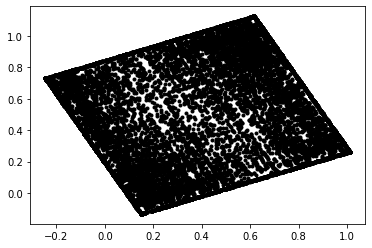

In [24]:
plt.figsize = (20,20)
for x, y in data.x[:, 3:5].cpu().numpy():
    plt.plot(x, y, marker='.', color='black')

plt.show()

In [25]:
import pickle
graph_dict = pickle.load(open(data.filepath.replace('.svg', '.pkl'), 'rb'))

In [26]:
graph_dict['pos']['spatial'], graph_dict['pos']['spatial'].shape

(array([[0.18980257, 0.27818993],
        [0.18980257, 0.27818993],
        [0.1935509 , 0.27818993],
        ...,
        [0.15583489, 0.08104484],
        [0.15583489, 0.07943807],
        [0.15638442, 0.07813552]]),
 (1282, 2))

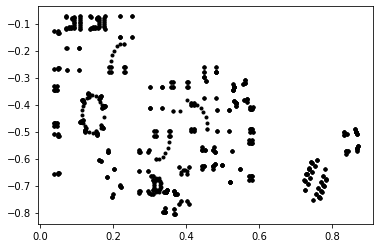

In [27]:
plt.figsize = (20,20)
for x, y in graph_dict['pos']['spatial']:
    plt.plot(x, -y, marker='.', color='black')

plt.show()

In [28]:
data.pos

tensor([[ 0.1709,  0.1097],
        [ 0.2579, -0.0823],
        [ 0.1494, -0.1321],
        ...,
        [ 0.9525,  0.3894],
        [ 0.9270,  0.2245],
        [ 0.0804,  0.0183]])

## _get_proposal

In [74]:
import pickle
from utils.det_util import bbox_iou_ios_cpu, intersect_bb_idx

class idxTree:
    def __init__(self):
        self.children = []
        self.value = {}

idx = 0
dataset = CADDataset(opt.data_dir, opt, partition = 'train', data_aug = opt.data_aug, do_mixup = opt.do_mixup, drop_edge = opt.drop_edge, bbox_sampling_step = opt.bbox_sampling_step)
graph_dict = pickle.load(open(dataset.svg_list[idx].replace('.svg', '.pkl'), 'rb'))
bbox_sampling_step = dataset.bbox_sampling_step

filepath = dataset.svg_list[idx]
width, height = graph_dict['img_width'], graph_dict['img_height']

gt_bbox, gt_labels = dataset._get_bbox(filepath, width, height)

In [75]:
#def _get_proposal(self, graph_dict, gt_bbox, gt_labels, bbox_sampling_step = -1):
cc = graph_dict['cc']
pos = graph_dict['pos']['spatial']
edge = graph_dict['edge']['shape']
edge_super = graph_dict['edge']['super']
e_attr = graph_dict['edge_attr']['shape']
e_attr_super = graph_dict['edge_attr']['super']
is_super = graph_dict['attr']['is_super']
is_control = graph_dict['attr']['is_control']
width = graph_dict['img_width']
height = graph_dict['img_height']

In [76]:
#print(pos.shape, is_super.shape, edge.shape, edge_super.shape, e_attr.shape, e_attr_super.shape)
#dataset.mixup
        
o2n = {}
count = 0
for i, ic in enumerate(is_control):
    if not ic:
        o2n[i] = count
        count += 1

new_edge = []
for e in edge:
    new_edge.append([o2n[e[0]], o2n[e[1]]])
edge = np.array(new_edge)

new_cc = []
for cluster in cc:
    new_cluster = []
    for idx in cluster:
        new_cluster.append(o2n[idx])
    new_cc.append(new_cluster)
cc = new_cc

new_edge = []
for e in edge_super:
    new_edge.append([o2n[e[0]], o2n[e[1]]])
edge_super = np.array(new_edge)

not_control = (is_control == 0)[:, 0]
pos = pos[not_control]
is_super = is_super[not_control]

In [77]:
#print('before mixup', len(cc), pos.shape, edge_super.shape, e_attr_super.shape)
if dataset.do_mixup:
    cc, pos, edge, edge_super, e_attr, e_attr_super, is_super = dataset.mixup(cc, pos, edge, edge_super, e_attr, e_attr_super, is_super)
#print('after mixup', len(cc), pos.shape, edge_super.shape, e_attr_super.shape)

In [78]:
new_pos = []
new_edge = []
new_edge_super = []
new_e_attr = []
new_e_attr_super = []
new_is_super = []
new_labels = []
new_bbox = []
bbox_targets = []
bbox_idx = []
stat_feats = []
has_objs = []
offset = 0
roots = []
bbox_count = 0

subcluster_slice_pos = [0]
subcluster_slice_edge = [0]
subcluster_slice_super = [0]
subcluster_slice_bbox = [0]

In [79]:
#for cc_idx, cluster in enumerate(cc):
cc_idx, cluster = 0, cc[0]
#cluster = [i for i in cluster if not is_super[i]]
pos_cluster = pos[cluster, :]
#print(pos_cluster)

max_x = pos_cluster[:, 0].max(0)
min_x = pos_cluster[:, 0].min(0)
max_y = pos_cluster[:, 1].max(0)
min_y = pos_cluster[:, 1].min(0)

#########################
x_values = sorted(pos_cluster[:, 0])
y_values = sorted(pos_cluster[:, 1])
#print('fooo', x_values, y_values)
def merge_values(values):
    new_values  = [values[0]]
    for i in range(1, len(values)):
        if values[i] != values[i - 1]: #> 1e-3:
            new_values.append(values[i])
    return new_values
x_values = merge_values(x_values)
y_values = merge_values(y_values)
#print(x_values, y_values)

def get_values_dict(values):
    values_dict = {}
    for i, v in enumerate(values):
        values_dict[v] = i
    return values_dict
x_values_dict = get_values_dict(x_values)
y_values_dict = get_values_dict(y_values)

In [80]:
pos_cluster, x_values, y_values

(array([[0.18980257, 0.27818993],
        [0.1935509 , 0.27818993],
        [0.18980257, 0.26085418],
        [0.1935509 , 0.26107088],
        [0.2042885 , 0.2000599 ],
        [0.23021137, 0.17450046],
        [0.23027232, 0.26114311],
        [0.23030279, 0.27862333],
        [0.23405112, 0.26128758],
        [0.23405112, 0.27862333]]),
 [0.1898025749793364,
  0.19355090167079939,
  0.2042885037231477,
  0.23021136822529223,
  0.23027231688117453,
  0.23030279120911562,
  0.2340511179005786],
 [0.17450045969773298,
  0.2000599004425799,
  0.2608541813602015,
  0.26107087823024533,
  0.26114311083123426,
  0.26128757556675064,
  0.2781899345787853,
  0.27862332878533447])

In [81]:
x_values_dict

{0.1898025749793364: 0,
 0.19355090167079939: 1,
 0.2042885037231477: 2,
 0.23021136822529223: 3,
 0.23027231688117453: 4,
 0.23030279120911562: 5,
 0.2340511179005786: 6}

In [82]:
use_bit = False

#point_exist = np.ones((len(y_values), len(x_values))).astype(np.int8) * (-1)
point_exist = [[[] for j in range(len(x_values))] for i in range(len(y_values))]
#print(x_values, y_values)

pos_idx = range(pos_cluster.shape[0])
if use_bit and len(pos_idx) > 64:
    print('more than 64 points in cc', len(pos_idx))
    pos_idx = random.sample(pos_idx, 64)

for i in pos_idx:
    p = pos_cluster[i]                
    point_exist[y_values_dict[p[1]]][x_values_dict[p[0]]].append(i)


In [83]:
p[0], x_values_dict[p[0]]

(0.2340511179005786, 6)

In [84]:
point_exist

[[[], [], [], [5], [], [], []],
 [[], [], [4], [], [], [], []],
 [[2], [], [], [], [], [], []],
 [[], [3], [], [], [], [], []],
 [[], [], [], [], [6], [], []],
 [[], [], [], [], [], [], [8]],
 [[0], [1], [], [], [], [], []],
 [[], [], [], [], [], [7], [9]]]

In [85]:
def set_bit(value, bit):
    return value | (1<<bit)

d00 = [[None for i in range(len(x_values))] for j in range(len(y_values))]
d00[0][0] = point_exist[0][0]

for i in range(1, len(x_values)):
    d00[0][i] = d00[0][i - 1] + point_exist[0][i]

for i in range(1, len(y_values)):
    d00[i][0] = d00[i - 1][0] + point_exist[i][0]

d_row = [[None for i in range(len(x_values))] for j in range(len(y_values))]
for i in range(0, len(x_values)):
    d_row[0][i] = d00[0][i]

for i in range(1, len(y_values)):
    d_row[i][0] = point_exist[i][0]

for y in range(1, len(y_values)):
    for x in range(1, len(x_values)):
        d_row[y][x] = d_row[y][x - 1] + point_exist[y][x]
        d00[y][x] = d00[y - 1][x] + d_row[y][x]

for y in range(0, len(y_values)):
    for x in range(0, len(x_values)):
        d00[y][x] = set(d00[y][x])

In [86]:
d00

[[set(), set(), set(), {5}, {5}, {5}, {5}],
 [set(), set(), {4}, {4, 5}, {4, 5}, {4, 5}, {4, 5}],
 [{2}, {2}, {2, 4}, {2, 4, 5}, {2, 4, 5}, {2, 4, 5}, {2, 4, 5}],
 [{2},
  {2, 3},
  {2, 3, 4},
  {2, 3, 4, 5},
  {2, 3, 4, 5},
  {2, 3, 4, 5},
  {2, 3, 4, 5}],
 [{2},
  {2, 3},
  {2, 3, 4},
  {2, 3, 4, 5},
  {2, 3, 4, 5, 6},
  {2, 3, 4, 5, 6},
  {2, 3, 4, 5, 6}],
 [{2},
  {2, 3},
  {2, 3, 4},
  {2, 3, 4, 5},
  {2, 3, 4, 5, 6},
  {2, 3, 4, 5, 6},
  {2, 3, 4, 5, 6, 8}],
 [{0, 2},
  {0, 1, 2, 3},
  {0, 1, 2, 3, 4},
  {0, 1, 2, 3, 4, 5},
  {0, 1, 2, 3, 4, 5, 6},
  {0, 1, 2, 3, 4, 5, 6},
  {0, 1, 2, 3, 4, 5, 6, 8}],
 [{0, 2},
  {0, 1, 2, 3},
  {0, 1, 2, 3, 4},
  {0, 1, 2, 3, 4, 5},
  {0, 1, 2, 3, 4, 5, 6},
  {0, 1, 2, 3, 4, 5, 6, 7},
  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}]]

In [87]:
sub_clusters = []
#print(len(y_values),len(x_values))


x_step = (max_x - min_x) / bbox_sampling_step #10 #5 #5#25
y_step = (max_y - min_y) / bbox_sampling_step #10 #5 #5
#print('x_step', x_step, 'y_step', y_step)
#print(d00)

x_grids = np.arange(min_x, max_x, x_step)
y_grids = np.arange(min_y, max_y, y_step)


x_grids = np.append(x_grids, max_x)
y_grids = np.append(y_grids, max_y)

In [88]:
bbox_sampling_step, x_grids, y_grids

(10,
 array([0.18980257, 0.19422743, 0.19865228, 0.20307714, 0.20750199,
        0.21192685, 0.2163517 , 0.22077656, 0.22520141, 0.22962626,
        0.23405112]),
 array([0.17450046, 0.18491275, 0.19532503, 0.20573732, 0.21614961,
        0.22656189, 0.23697418, 0.24738647, 0.25779875, 0.26821104,
        0.27862333]))

In [89]:
#print(x_grids, y_grids)
def move_endpoint(x, values, bound):
    if x >= len(values):
        return x - 1

    while values[x] <= bound:
        x += 1
        if x >= len(values):
            break
    return x - 1

def move_endpoint_close(x, values, bound):
    if x >= len(values):
        return x - 1

    while values[x] < bound:
        x += 1
        if x >= len(values):
            break
    return x - 1

prev_y0 = -1
grid_y0 = 0
for i_grid_y0, grid_y0 in enumerate(y_grids):
    y0 = move_endpoint_close(prev_y0 + 1, y_values, grid_y0)
    if y0 != len(y_values): y0 += 1
    if y0 == prev_y0: continue
    prev_y0 = y0
    
    grid_x0 = x_values[0]
    prev_x0 = -1
    for i_grid_x0, grid_x0 in enumerate(x_grids):
        x0 = move_endpoint_close(prev_x0 + 1, x_values, grid_x0)
        if x0 != len(y_values): x0 += 1
        if x0 == prev_x0: continue
        prev_x0 = x0
        
        #grid_y1 = grid_y0
        prev_y1 = y0
        for grid_y1 in y_grids[i_grid_y0 + 1 :]:
            y1 = move_endpoint(prev_y1 + 1, y_values, grid_y1)
            #if prev_y1 + 1 < len(y_values):
            #    print(prev_y1 + 1, y_values[prev_y1 + 1], 'to', grid_y1)
            if y1 == prev_y1: continue
            #print('---------------', prev_y1, 'to', y1, y_values[prev_y1], 'to', grid_y1)
            prev_y1 = y1
            
            #grid_x1 = grid_x0
            prev_x1 = x0
            for grid_x1 in x_grids[i_grid_x0 + 1:]:
                x1 = move_endpoint(prev_x1 + 1, x_values, grid_x1)
                if x1 == prev_x1: continue
                prev_x1 = x1
                
                if use_bit:
                    if x0 > 0 and y0 > 0:
                        dd = d00[y1][x1] - (d00[y1][x0 - 1] | d00[y0 - 1][x1])
                    elif x0 > 0 and y0 == 0:
                        dd = d00[y1][x1] - d00[y1][x0 - 1]
                    elif y0 > 0 and x0 == 0:
                        dd = d00[y1][x1] - d00[y0 - 1][x1]
                    else:
                        dd = d00[y1][x1]
                    if dd == 0: continue
                    count = 0
                    sub_c = []
                    while dd != 0:
                        if dd & 1:
                            sub_c.append(count)
                        count += 1
                        dd = dd >> 1
                    sub_c = [cluster[ii] for ii in sub_c]
                    sub_clusters.append(tuple(sub_c))
                else:
                    if x0 > 0 and y0 > 0:
                        dd = d00[y1][x1].difference(d00[y1][x0 - 1]).difference(d00[y0 - 1][x1])
                    elif x0 > 0 and y0 == 0:
                        dd = d00[y1][x1].difference(d00[y1][x0 - 1])
                    elif y0 > 0 and x0 == 0:
                        dd = d00[y1][x1].difference(d00[y0 - 1][x1])
                    else:
                        dd = d00[y1][x1]
                    #print(x0, y0, x1, y1, 'fooo')
                    sub_c = [cluster[ii] for ii in dd]
                    sub_clusters.append(tuple(sorted(sub_c)))

sub_clusters = list(set(sub_clusters))

In [90]:
sub_clusters

[(4, 6, 7, 8, 304),
 (0, 1, 2, 3, 4, 6, 7, 8),
 (2,),
 (4, 8, 304),
 (5,),
 (304,),
 (4, 5, 6, 7, 8),
 (8,),
 (0, 1, 2, 3, 4, 6, 7, 8, 304),
 (2, 4, 8),
 (2, 3, 4, 8, 304),
 (4, 6, 7, 8),
 (6, 7, 8),
 (0, 1, 4, 6, 7, 8),
 (4, 8),
 (0, 1, 2),
 (2, 3, 4, 8),
 (0, 1),
 (4, 5, 8),
 (0, 1, 6, 7),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 304),
 (2, 3, 304),
 (6, 7),
 (0, 1, 2, 3),
 (0, 1, 2, 3, 304),
 (4, 5, 8, 304),
 (0, 1, 6, 7, 8),
 (5, 304),
 (4, 5, 6, 7, 8, 304),
 (2, 3),
 (0, 1, 2, 4, 6, 7, 8),
 (2, 3, 4, 5, 8, 304),
 ()]

In [91]:
#########################
def get_adj(edge):
    #adj = -np.ones((pos.shape[0], pos.shape[0])).astype(np.int)
    adj = [[[] for j in range(pos.shape[0])] for j in range(pos.shape[0])]
    for i, e in enumerate(edge):
        #adj[e[0], e[1]] = i
        #adj[e[1], e[0]] = i
        adj[e[0]][e[1]].append(i)
        adj[e[1]][e[0]].append(i)
    return adj

A = get_adj(edge)
A_super = get_adj(edge_super)
#print(A)

bbox_cc = np.array([min_x, min_y, max_x, max_y])[None, :]
gt_bbox_idx_valid = intersect_bb_idx(bbox_cc, gt_bbox)
if gt_bbox_idx_valid.shape[0] == 0:
    print('cc has no intersect gt bbox')
    raise SystemExit

sub_bbox_n = 0

In [92]:
A

[[[],
  [177],
  [],
  [18],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],

In [93]:
for idxs in sub_clusters:
    o2n = {}
    for i, idx in enumerate(idxs):
        o2n[idx] = i
    pos_bbox = pos[idxs, :]
    is_super_bbox = is_super[idxs, :]
    #idxs = set(idxs)
    
    edge_idxs = []
    for i in range(len(idxs)):
        for j in range(i + 1, len(idxs)):
            #if A[idxs[i], idxs[j]] >= 0:
                #edge_idxs.append(A[idxs[i], idxs[j]])
            edge_idxs+= A[idxs[i]][idxs[j]]

    edge_bbox = edge[edge_idxs]
    if edge_bbox.shape[0] == 0:
        continue
    #print(edge_bbox)
    edge_bbox = np.array([[o2n[e[0]] + offset, o2n[e[1]] + offset] for e in edge_bbox])
    e_attr_bbox = e_attr[edge_idxs]
    
    edge_idxs = []
    for i in range(len(idxs)):
        for j in range(i + 1, len(idxs)):
            #if A_super[idxs[i], idxs[j]] >= 0:
                #edge_idxs.append(A_super[idxs[i], idxs[j]])
            edge_idxs += A_super[idxs[i]][idxs[j]]
    
    edge_super_bbox = edge_super[edge_idxs]
    edge_super_bbox = np.array([[o2n[e[0]] + offset, o2n[e[1]] + offset] for e in edge_super_bbox])
    e_attr_super_bbox = e_attr_super[edge_idxs]
    
    #print(count, offset, pos_bbox.shape, is_super_bbox.shape, edge_bbox.shape, edge_super_bbox.shape, e_attr_bbox.shape, e_attr_super_bbox.shape)

    max_x = pos_bbox[:, 0].max(0)
    min_x = pos_bbox[:, 0].min(0)
    max_y = pos_bbox[:, 1].max(0)
    min_y = pos_bbox[:, 1].min(0)
                    
    if max_x - min_x < 1e-4 or max_y - min_y < 1e-4:
        continue
        
    proposal = np.array([min_x, min_y, max_x, max_y])[None, :]
    iou, ios = bbox_iou_ios_cpu(proposal, gt_bbox[gt_bbox_idx_valid, :])
    idx_gt = np.argmax(iou)
    
    
    if iou[idx_gt] > 0.7:
        label = gt_labels[gt_bbox_idx_valid[idx_gt]]                    
        bbox_target = gt_bbox[gt_bbox_idx_valid[idx_gt]][None, :]

    else:
        label = dataset.n_classes - 1
        bbox_target = np.zeros((1, 4))

    idx_gt = np.argmax(iou)
    if ios[idx_gt] > 0.7:
        has_obj = 1
    else:
        has_obj = 0
    
    
    ######################obtain stats#################################
    stats = []
    n_points = pos_bbox.shape[0]
    n_edges = edge_bbox.shape[0]
    
    n_angle_less90 = 0
    n_angle_90 = 0
    n_angle_more90 = 0
    adj = [set() for i in range(pos.shape[0])]

    for e in edge_bbox:
        adj[e[0] - offset].add(e[1] - offset)
        adj[e[1] - offset].add(e[0] - offset)
        
    angles = []
    for anchor, neighbors in enumerate(adj):
        neighbors = list(neighbors)
        for i in range(len(neighbors)):
            for j in range(i + 1, len(neighbors)):
                p0 = pos_bbox[neighbors[i]]
                p1 = pos_bbox[neighbors[j]]
                p_anchor = pos_bbox[anchor]
                v0 = p0 - p_anchor
                v1 = p1 - p_anchor

                dot = v0[0] * v1[0] + v0[1] * v1[1]
                if dot <= -1e-2:
                    n_angle_more90 += 1
                elif dot >= 1e-2:
                    n_angle_less90 += 1
                elif np.abs(dot) < 1e-2:
                    n_angle_90 +=1
                angles.append(dot)
                
    width = max_x - min_x
    height = max_y - min_y

    if len(angles) == 0:
        continue
    
    angles = np.array(angles)
    mean_angle = np.mean(angles)
    max_angle = np.max(angles)
    min_angle = np.min(angles)
    std_angle = np.std(angles)

    long_short_ratio = max(width, height) * 1.0 / min(width, height)

    mean_edge_distance = np.mean(e_attr_bbox[:, -1])
    std_edge_distance = np.std(e_attr_bbox[:, -1])
    mean_edge_angle = np.mean(e_attr_bbox[:, -2])
    std_edge_angle = np.std(e_attr_bbox[:, -2])

    '''
    stat_feat = np.array([n_points, n_edges, n_angle_90, n_angle_less90, n_angle_more90, 
        width, height, mean_angle, max_angle, min_angle, std_angle, mean_edge_angle, 
        std_edge_angle, mean_edge_distance, std_edge_distance])[None, :]
        #, long_short_ratio])[None, :]
    '''
    
    stat_feat = np.array([n_points, n_edges, n_angle_90, n_angle_less90, n_angle_more90, 
        width, height, mean_angle, max_angle, min_angle, std_angle, mean_edge_distance, std_edge_distance])[None, :]

    if dataset.normalize_bbox:
        '''
        if max_x - min_x >  max_y - min_y:
            pos_bbox = (pos_bbox - [min_x, min_y]) / [max_x - min_x, max_x - min_x]
        else:
            pos_bbox = (pos_bbox - [min_x, min_y]) / [max_y - min_y, max_y - min_y]
        '''
        pos_bbox = (pos_bbox - [min_x, min_y]) / [max_x - min_x, max_y - min_y]
    

    subcluster_slice_pos.append(subcluster_slice_pos[-1] + pos_bbox.shape[0])
    subcluster_slice_edge.append(subcluster_slice_edge[-1] + edge_bbox.shape[0])
    subcluster_slice_super.append(subcluster_slice_super[-1] + edge_super_bbox.shape[0])
    subcluster_slice_bbox.append(subcluster_slice_bbox[-1] + 1)

    new_pos.append(pos_bbox)
    new_is_super.append(is_super_bbox)
    if edge_bbox.shape[0] > 0:
        new_edge.append(edge_bbox)
    if edge_super_bbox.shape[0] > 0:
        new_edge_super.append(edge_super_bbox)
    new_e_attr.append(e_attr_bbox)
    new_e_attr_super.append(e_attr_super_bbox)
    new_labels.append(label)
    has_objs.append(has_obj)
    bbox_idx += [bbox_count] * pos_bbox.shape[0]
    offset += pos_bbox.shape[0]
    new_bbox.append([min_x, min_y, max_x, max_y])
    bbox_targets.append(bbox_target)
    stat_feats.append(stat_feat)

    sub_bbox_n += 1
    bbox_count += 1

In [94]:
#print(sub_bbox_n, subcluster_slice_pos, subcluster_slice_edge, subcluster_slice_super, subcluster_slice_bbox)

idx_offset = len(subcluster_slice_bbox) - sub_bbox_n - 1
sub_bbox = np.array(new_bbox)[subcluster_slice_bbox[idx_offset]:]
#print(sub_bbox, sub_bbox.shape)
area = (sub_bbox[:, 2] - sub_bbox[:, 0]) * (sub_bbox[:, 3] - sub_bbox[:, 1])
#print(area)
max_idx = np.argmax(area)
#print('root idx', max_idx)
root = idxTree()
root.value['idx_pos'] = (subcluster_slice_pos[idx_offset + max_idx], subcluster_slice_pos[idx_offset + max_idx + 1])
root.value['idx_edge'] = (subcluster_slice_edge[idx_offset + max_idx], subcluster_slice_edge[idx_offset + max_idx + 1])
root.value['idx_edge_super'] = (subcluster_slice_super[idx_offset + max_idx], subcluster_slice_super[idx_offset + max_idx + 1])
root.value['idx_bbox'] = subcluster_slice_bbox[idx_offset + max_idx]

#print(root.value)

#print(subcluster_slice_pos, len(bbox_idx))
for i in range(sub_bbox.shape[0]):
    if i == max_idx: continue
    p = idxTree()
    p.value['idx_pos'] = (subcluster_slice_pos[idx_offset + i], subcluster_slice_pos[idx_offset + i + 1])
    p.value['idx_edge'] = (subcluster_slice_edge[idx_offset + i], subcluster_slice_edge[idx_offset + i + 1])
    p.value['idx_edge_super'] = (subcluster_slice_super[idx_offset + i], subcluster_slice_super[idx_offset + i + 1])
    p.value['idx_bbox'] = subcluster_slice_bbox[idx_offset + i]
    root.children.append(p)
#print(subcluster_slice_pos, subcluster_slice_edge, subcluster_slice_super, subcluster_slice_bbox)
roots.append(root)

#print(len(bbox_idx), np.concatenate(new_pos, axis = 0).shape)
#raise SystemExit

In [73]:
pos = np.concatenate(new_pos, axis = 0)
is_super = np.concatenate(new_is_super, axis = 0)
edge = np.concatenate(new_edge, axis = 0)
edge_super = np.concatenate(new_edge_super, axis = 0)
e_attr = np.concatenate(new_e_attr, axis = 0)
e_attr_super = np.concatenate(new_e_attr_super, axis = 0)
labels = new_labels
new_bbox = np.array(new_bbox)
bbox_targets = np.concatenate(bbox_targets, axis = 0)
bbox_idx = np.array(bbox_idx)
is_control = np.zeros((pos.shape[0], 1))
stat_feats = np.concatenate(stat_feats, axis = 0)
has_obj = has_objs
#print(pos.shape, is_super.shape, edge.shape, edge_super.shape, e_attr.shape, e_attr_super.shape)
#print(pos.shape)

#return pos, is_super, is_control, edge, edge_super, e_attr, e_attr_super, labels, bbox_idx, new_bbox, bbox_targets, stat_feats, has_obj, roots

In [51]:
pos_bbox, new_pos

(array([], shape=(0, 2), dtype=float64),
 [array([[0.87303531, 0.77750184],
         [0.87405923, 1.        ],
         [1.        , 1.        ],
         [1.        , 0.77934067],
         [0.        , 0.        ]]),
  array([[0.        , 0.97560974],
         [0.08471074, 0.97560974],
         [0.08471074, 0.01219512],
         [0.        , 0.        ],
         [0.91460055, 0.01626018],
         [0.91528926, 1.        ],
         [1.        , 1.        ],
         [1.        , 0.02439026]]),
  array([[0.01587308, 0.83211932],
         [0.        , 0.        ],
         [0.02380962, 1.        ],
         [1.        , 1.        ],
         [1.        , 0.83350677]]),
  array([[0.        , 0.99448351],
         [0.08471074, 0.99448351],
         [0.08471074, 0.77658243],
         [0.        , 0.77382419],
         [0.91460055, 0.77750184],
         [0.91528926, 1.        ],
         [1.        , 1.        ],
         [1.        , 0.77934067],
         [0.3273764 , 0.        ]]),
  arra

In [97]:
pos

array([[0.18980257, 0.27818993],
       [0.1935509 , 0.27818993],
       [0.1935509 , 0.26107088],
       [0.18980257, 0.26085418],
       [0.23027232, 0.26114311],
       [0.23021137, 0.17450046],
       [0.23030279, 0.27862333],
       [0.23405112, 0.27862333],
       [0.23405112, 0.26128758],
       [0.04878427, 0.12830569],
       [0.04878427, 0.13521012],
       [0.04878427, 0.26322966],
       [0.04878427, 0.26984641],
       [0.03810357, 0.12830569],
       [0.03810357, 0.26984641],
       [0.05242542, 0.26322966],
       [0.05242542, 0.13521012],
       [0.57591587, 0.409086  ],
       [0.57599356, 0.417557  ],
       [0.57576048, 0.49121788],
       [0.57591587, 0.49987303],
       [0.58182048, 0.49987303],
       [0.58182048, 0.409086  ],
       [0.58174279, 0.417557  ],
       [0.58174279, 0.49121788],
       [0.57902356, 0.41737285],
       [0.57902356, 0.49103372],
       [0.04936101, 0.50987875],
       [0.04936101, 0.5171403 ],
       [0.04936101, 0.65178155],
       [0.

In [100]:
np.concatenate(new_pos, axis=0)

array([[0.87303531, 0.77750184],
       [0.87405923, 1.        ],
       [1.        , 1.        ],
       [1.        , 0.77934067],
       [0.        , 0.        ],
       [0.        , 0.97560974],
       [0.08471074, 0.97560974],
       [0.08471074, 0.01219512],
       [0.        , 0.        ],
       [0.91460055, 0.01626018],
       [0.91528926, 1.        ],
       [1.        , 1.        ],
       [1.        , 0.02439026],
       [0.01587308, 0.83211932],
       [0.        , 0.        ],
       [0.02380962, 1.        ],
       [1.        , 1.        ],
       [1.        , 0.83350677],
       [0.        , 0.99448351],
       [0.08471074, 0.99448351],
       [0.08471074, 0.77658243],
       [0.        , 0.77382419],
       [0.91460055, 0.77750184],
       [0.91528926, 1.        ],
       [1.        , 1.        ],
       [1.        , 0.77934067],
       [0.3273764 , 0.        ],
       [0.08471074, 0.99646079],
       [0.        , 0.9929216 ],
       [0.91460055, 0.99764053],
       [1.

In [102]:
edge

array([[295, 302],
       [197, 199],
       [116, 118],
       [117, 118],
       [148, 149],
       [  5, 304],
       [157, 162],
       [174, 175],
       [188, 189],
       [ 11,  15],
       [208, 209],
       [ 75,  76],
       [  1,   2],
       [195, 196],
       [249, 250],
       [221, 225],
       [316, 319],
       [179, 182],
       [  0,   3],
       [234, 235],
       [153, 155],
       [237, 241],
       [244, 245],
       [232, 236],
       [290, 291],
       [ 68,  69],
       [ 61,  62],
       [239, 240],
       [320, 321],
       [157, 158],
       [ 53,  54],
       [ 77,  78],
       [278, 279],
       [ 71,  72],
       [150, 154],
       [298, 299],
       [276, 290],
       [322, 323],
       [196, 198],
       [101, 102],
       [184, 185],
       [ 80,  81],
       [131, 132],
       [282, 283],
       [213, 214],
       [168, 169],
       [143, 146],
       [137, 138],
       [265, 266],
       [137, 142],
       [122, 123],
       [158, 165],
       [309,

In [104]:
np.concatenate(new_edge, axis=0)

array([[  0,   1],
       [  0,   3],
       [  1,   2],
       [  2,   3],
       [  5,   6],
       [  5,   8],
       [  6,   7],
       [  7,   8],
       [  9,  10],
       [  9,  12],
       [ 10,  11],
       [ 11,  12],
       [ 13,  14],
       [ 13,  15],
       [ 13,  17],
       [ 15,  16],
       [ 16,  17],
       [ 18,  19],
       [ 18,  21],
       [ 19,  20],
       [ 20,  21],
       [ 20,  26],
       [ 22,  23],
       [ 22,  25],
       [ 23,  24],
       [ 24,  25],
       [ 27,  28],
       [ 27,  31],
       [ 29,  30],
       [ 32,  33],
       [ 32,  35],
       [ 33,  34],
       [ 34,  35],
       [ 36,  37],
       [ 37,  38],
       [ 39,  40],
       [ 41,  42],
       [ 41,  44],
       [ 42,  43],
       [ 43,  44],
       [ 45,  46],
       [ 46,  47],
       [ 48,  49],
       [ 48,  50],
       [ 51,  52],
       [ 51,  54],
       [ 52,  53],
       [ 53,  54],
       [ 53,  60],
       [ 55,  56],
       [ 55,  57],
       [ 55,  59],
       [ 56,

## test.pyを動かしてみる

In [1]:
%run cad_recognition/train.py --total_epochs 20 --batch_size 4 --data_dir data/FloorPlansGraph5_iter --phase train --lr 2.5e-4 --lr_adjust_freq 9999999999999999999999999999999999999 --in_channels 5 --n_blocks 2 --n_blocks_out 2 --arch centernet3cc_rpn_gp_iter2  --graph bezier_cc_bb_iter --data_aug false --weight_decay 1e-5 --postname run182_2 --dropout 0.0 --do_mixup 0 --bbox_sampling_step 10 --pretrained_model log/sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220802-115745_45ea7aa5-fa20-4360-8326-1e9149865d19/checkpoint/run182_2_best.pth

c:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-08-03 09:53:51,691 saving log, checkpoint and back up code
2022-08-03 09:53:51,692 ==========       args      =============
2022-08-03 09:53:51,693 phase:train
2022-08-03 09:53:51,693 use_cpu:False
2022-08-03 09:53:51,694 exp_name:sem_seg_sparse
2022-08-03 09:53:51,695 root_dir:log
2022-08-03 09:53:51,695 data_dir:data/FloorPlansGraph5_iter
2022-08-03 09:53:51,696 batch_size:4
2022-08-03 09:53:51,697 in_channels:5
2022-08-03 09:53:51,697 total_epochs:20
2022-08-03 09:53:51,697 save_freq:5
2022-08-03 09:53:51,698 iter:0
2022-08-03 09:53:51,698 lr_adjust_freq:9999999999999999999999999999999999999
2022-08-03 09:53:51,699 lr:0.00025
2022-08-03 09:53:51,699 lr_decay_rate:0.5
2022-08-03 09:53:51,700 print_freq:5
2022-08-03 09:53:51,700 postname:run182_2
2022-08-03 09:53:51,701 multi_gpus:False
2022-08-03 09:53:51,701 seed:0
2022-08-03 09:53:51,702 pos_edge_th:0.005
2022-08-03 09:53:51,702 lambda_class:1
2022-08-03 09:53:51,703 lambda_offset:1
2022-08-03 09:53:51,703 lambda_size:10
2022-

In [1]:
%run cad_recognition/test.py \
    --total_epochs 20 \
    --batch_size 4 \
    --data_dir data/FloorPlansGraph5_iter \
    --phase train \
    --lr 2.5e-4 \
    --lr_adjust_freq 9999999999999999999999999999999999999 \
    --in_channels 5 \
    --n_blocks 2 \
    --n_blocks_out 2 \
    --arch centernet3cc_rpn_gp_iter2  \
    --graph bezier_cc_bb_iter \
    --data_aug false \
    --weight_decay 1e-5 \
    --postname run182_2 \
    --dropout 0.0 \
    --do_mixup 0 \
    --bbox_sampling_step 10 \
    --pretrained_model log/sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220802-115745_45ea7aa5-fa20-4360-8326-1e9149865d19/checkpoint/run182_2_best.pth

c:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-08-03 21:24:40,299 saving log, checkpoint and back up code
2022-08-03 21:24:40,300 ==========       args      =============
2022-08-03 21:24:40,301 phase:train
2022-08-03 21:24:40,301 use_cpu:False
2022-08-03 21:24:40,301 exp_name:sem_seg_sparse
2022-08-03 21:24:40,302 root_dir:log
2022-08-03 21:24:40,302 data_dir:data/FloorPlansGraph5_iter
2022-08-03 21:24:40,302 batch_size:4
2022-08-03 21:24:40,303 in_channels:5
2022-08-03 21:24:40,303 total_epochs:20
2022-08-03 21:24:40,304 save_freq:5
2022-08-03 21:24:40,304 iter:0
2022-08-03 21:24:40,305 lr_adjust_freq:9999999999999999999999999999999999999
2022-08-03 21:24:40,307 lr:0.00025
2022-08-03 21:24:40,307 lr_decay_rate:0.5
2022-08-03 21:24:40,307 print_freq:5
2022-08-03 21:24:40,308 postname:run182_2
2022-08-03 21:24:40,309 multi_gpus:False
2022-08-03 21:24:40,309 seed:0
2022-08-03 21:24:40,309 pos_edge_th:0.005
2022-08-03 21:24:40,310 lambda_class:1
2022-08-03 21:24:40,310 lambda_offset:1
2022-08-03 21:24:40,311 lambda_size:10
2022-

RuntimeError: CUDA out of memory. Tried to allocate 234.00 MiB (GPU 0; 8.00 GiB total capacity; 315.55 MiB already allocated; 6.23 GiB free; 360.00 MiB reserved in total by PyTorch)

In [1]:
%run cad_recognition/detect.py \
    --total_epochs 20 \
    --batch_size 4 \
    --data_dir data/FloorPlansGraph5_iter \
    --phase train \
    --lr 2.5e-4 \
    --lr_adjust_freq 9999999999999999999999999999999999999 \
    --in_channels 5 \
    --n_blocks 2 \
    --n_blocks_out 2 \
    --arch centernet3cc_rpn_gp_iter2  \
    --graph bezier_cc_bb_iter \
    --data_aug false \
    --weight_decay 1e-5 \
    --postname run182_2 \
    --dropout 0.0 \
    --do_mixup 0 \
    --bbox_sampling_step 10 \
    --pretrained_model log/sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220802-115745_45ea7aa5-fa20-4360-8326-1e9149865d19/checkpoint/run182_2_best.pth

c:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-08-03 22:39:01,404 saving log, checkpoint and back up code
2022-08-03 22:39:01,405 ==========       args      =============
2022-08-03 22:39:01,406 phase:train
2022-08-03 22:39:01,406 use_cpu:False
2022-08-03 22:39:01,407 exp_name:sem_seg_sparse
2022-08-03 22:39:01,407 root_dir:log
2022-08-03 22:39:01,408 data_dir:data/FloorPlansGraph5_iter
2022-08-03 22:39:01,408 batch_size:4
2022-08-03 22:39:01,408 in_channels:5
2022-08-03 22:39:01,409 total_epochs:20
2022-08-03 22:39:01,409 save_freq:5
2022-08-03 22:39:01,409 iter:0
2022-08-03 22:39:01,410 lr_adjust_freq:9999999999999999999999999999999999999
2022-08-03 22:39:01,410 lr:0.00025
2022-08-03 22:39:01,410 lr_decay_rate:0.5
2022-08-03 22:39:01,411 print_freq:5
2022-08-03 22:39:01,411 postname:run182_2
2022-08-03 22:39:01,413 multi_gpus:False
2022-08-03 22:39:01,413 seed:0
2022-08-03 22:39:01,413 pos_edge_th:0.005
2022-08-03 22:39:01,414 lambda_class:1
2022-08-03 22:39:01,414 lambda_offset:1
2022-08-03 22:39:01,415 lambda_size:10
2022-

In [1]:
%run cad_recognition/draw_graph.py \
    --total_epochs 20 \
    --batch_size 4 \
    --data_dir data/FloorPlansGraph5_iter \
    --phase train \
    --lr 2.5e-4 \
    --lr_adjust_freq 9999999999999999999999999999999999999 \
    --in_channels 5 \
    --n_blocks 2 \
    --n_blocks_out 2 \
    --arch centernet3cc_rpn_gp_iter2  \
    --graph bezier_cc_bb_iter \
    --data_aug false \
    --weight_decay 1e-5 \
    --postname run182_2 \
    --dropout 0.0 \
    --do_mixup 0 \
    --bbox_sampling_step 10 \
    --pretrained_model log/sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220802-115745_45ea7aa5-fa20-4360-8326-1e9149865d19/checkpoint/run182_2_best.pth

c:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-08-03 22:12:06,358 saving log, checkpoint and back up code
2022-08-03 22:12:06,358 ==========       args      =============
2022-08-03 22:12:06,359 phase:train
2022-08-03 22:12:06,359 use_cpu:False
2022-08-03 22:12:06,360 exp_name:sem_seg_sparse
2022-08-03 22:12:06,361 root_dir:log
2022-08-03 22:12:06,361 data_dir:data/FloorPlansGraph5_iter
2022-08-03 22:12:06,362 batch_size:4
2022-08-03 22:12:06,363 in_channels:5
2022-08-03 22:12:06,363 total_epochs:20
2022-08-03 22:12:06,363 save_freq:5
2022-08-03 22:12:06,364 iter:0
2022-08-03 22:12:06,364 lr_adjust_freq:9999999999999999999999999999999999999
2022-08-03 22:12:06,365 lr:0.00025
2022-08-03 22:12:06,366 lr_decay_rate:0.5
2022-08-03 22:12:06,367 print_freq:5
2022-08-03 22:12:06,368 postname:run182_2
2022-08-03 22:12:06,368 multi_gpus:False
2022-08-03 22:12:06,369 seed:0
2022-08-03 22:12:06,369 pos_edge_th:0.005
2022-08-03 22:12:06,370 lambda_class:1
2022-08-03 22:12:06,370 lambda_offset:1
2022-08-03 22:12:06,371 lambda_size:10
2022-